In [47]:
#import every package needed
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from urllib.request import urlopen
from bs4 import BeautifulSoup
import collections

In [48]:
#arrays to store data used in tasks
ims = []
r_channels = []
g_channels = []
b_channels = []
signal_data = []

In [49]:
def read_files():
    for i in range(5):        
        im = Image.open(str(i) + ".png") #read images
        im = im.convert('RGB')           #convert to get RGB values
        im = np.array(im)                #transform it into a numpy array
        ims.append(im)                   #store in global array

In [50]:
def task_01():
    for i in range(len(ims)):
        
        plt.subplots_adjust(hspace=.5, wspace=.5)
        fig, axs = plt.subplots(2, 2)
        fig.suptitle("Image: "+ str(i) + ".png")
        
        im = ims[i]
        
        r_channel = np.reshape(im[:,:,0],256*256)     #store different color channel values in different arrays
        g_channel = np.reshape(im[:,:,1],256*256)
        b_channel = np.reshape(im[:,:,2],256*256)

        r_channels.append(r_channel)    #store globally for other tasks
        g_channels.append(g_channel)
        b_channels.append(b_channel)
        
        plt.subplot(222)
        plt.hist(r_channel, bins=256)       #display red channel values on a histogram (256 bins for 256 possible values)
        plt.title("Red Channel Histogram")

        plt.subplot(223)
        plt.hist(g_channel, bins=256)         #display green channel values on a histogram
        plt.title("Green Channel Histogram")

        plt.subplot(224)
        plt.hist(b_channel, bins=256)        #display blue channel values on a histogram
        plt.title("Blue Channel Histogram")

        plt.subplot(221).imshow(im)

In [51]:
def task_02():
    channel_values = [] #array to store average and deviation values
    for i in range(5): #populate array with the values of all 5 images
        channel_values.append(np.average(r_channels[i])) #add average and deviation values of each color channel to array
        channel_values.append(np.std(r_channels[i]))
        channel_values.append(np.average(g_channels[i]))
        channel_values.append(np.std(g_channels[i]))
        channel_values.append(np.average(b_channels[i]))
        channel_values.append(np.std(b_channels[i]))
        
    channel_values_std = standardise(channel_values)
    
    print("Expected Value: " + str(np.average(channel_values_std))) #print the expected value of the standardised array (should be 0)
    print("Deviation: " + str(np.std(channel_values_std))) #print the deviation of the standardised array (should be 1)

In [52]:
def standardise(values):
    values_avg = np.average(values) #calculate the average of the values
    values_dev = np.std(values) #calculate the deviation of the values
    return (values - values_avg)/values_dev  #return the standardised elements

In [53]:
def task_03():
    for i in range(2):
        sampling_frequency, sd = wavfile.read(str(i) + '.wav')  #read wav file
        signal_data.append(sd)  #store it globally
        plt.specgram(sd, cmap = "viridis") #display it on a spectogram
        plt.show()

In [54]:
def task_04():
    signal_concat = np.concatenate((signal_data[0], signal_data[1]), axis=0) #concatenate the two wav files
    signal_std = standardise(signal_concat) #standardise their concatenated values
    
    print("Expected Value: " + str(np.average(signal_std))) #print the expected value of the standardised array (should be 0)
    print("Deviation: " + str(np.std(signal_std))) #print the deviation of the standardised array (should be 1)

In [55]:
def task_05():
    url = "http://smartlab.tmit.bme.hu/oktatas-deep-learning"
    html = urlopen(url).read() #read url data
    soup = BeautifulSoup(html, features="html.parser") #use BeautifulSoup package to work on the text

    for script in soup(["script", "style"]): #extract everything non plain text from the text (e.g. html code)
        script.extract()   

    text = soup.get_text() #display text
    print(text)
    
    characters = list(text) #transform the text into a list of characters
    occurrencies = collections.Counter(characters) #sort the list by different characters
    plt.figure(figsize=(30,30))
    plt.figure
    plt.hist(characters, edgecolor="black", bins=len(occurrencies)) #display the text on a histogram by it's characters
    plt.show()                                                      #bin number is the number of different characters

In [56]:
read_files()

<Figure size 432x288 with 0 Axes>

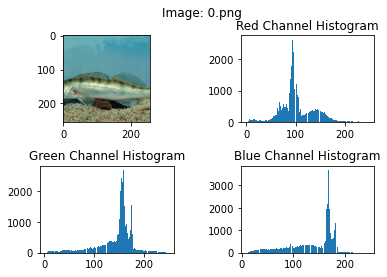

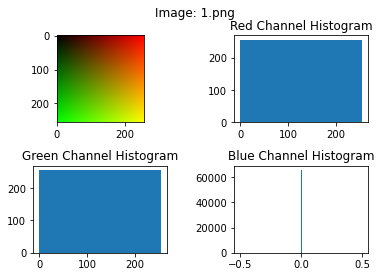

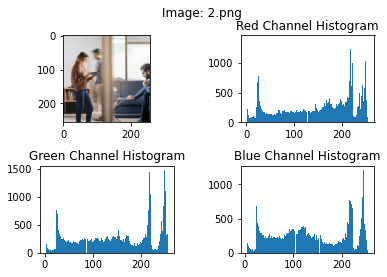

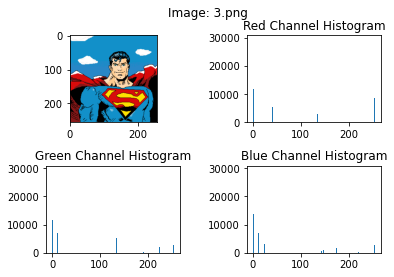

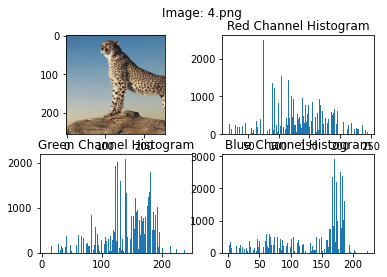

In [57]:
task_01()

In [58]:
task_02()

Expected Value: 8.511709855459534e-17
Deviation: 1.0


<ipython-input-53-205ab895760b>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_frequency, sd = wavfile.read(str(i) + '.wav')  #read wav file


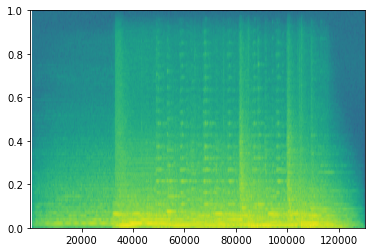

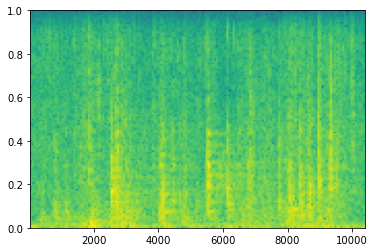

In [59]:
task_03()

In [60]:
task_04()

Expected Value: 8.907952491172699e-18
Deviation: 1.0000000000000002






  

Deep Learning a gyakorlatban Python és LUA alapon - VITMAV45 | SmartLab, BME TMIT


















































Languages


Magyar

English







Menü be/kikapcsolás











                            RÓLUNK
                        

Laborunkról
Munkatársaink
Média megjelenések






                            MEGOLDÁSAINK
                        

Profivox magyar nyelvű felolvasó (korpuszos)
Profivox magyar nyelvű felolvasó (DNN)
Profivox magyar nyelvű felolvasó (HMM)
Profivox magyar nyelvű felolvasó (diádos,triádos)
StrokeAid

Alkalmazások

Jaws for Windows integráció
Időjárás mindenkinek (magyar, Windows 8)
AALFred (5 nyelven, Windows 8.1)
Robobraille
Beszélő ATM-ek

Gyógyszervonal (OGYI)

Árlista felolvasó (T-mobile)
Keleti pályaudvar bemondórendszere
Mindenség elmélete c. film gépi beszéd szinkron








                            K+F
                        


Kutatási projektek (folyamatban)
Kutatási projektek (befejezett)
Publikációk (összes)

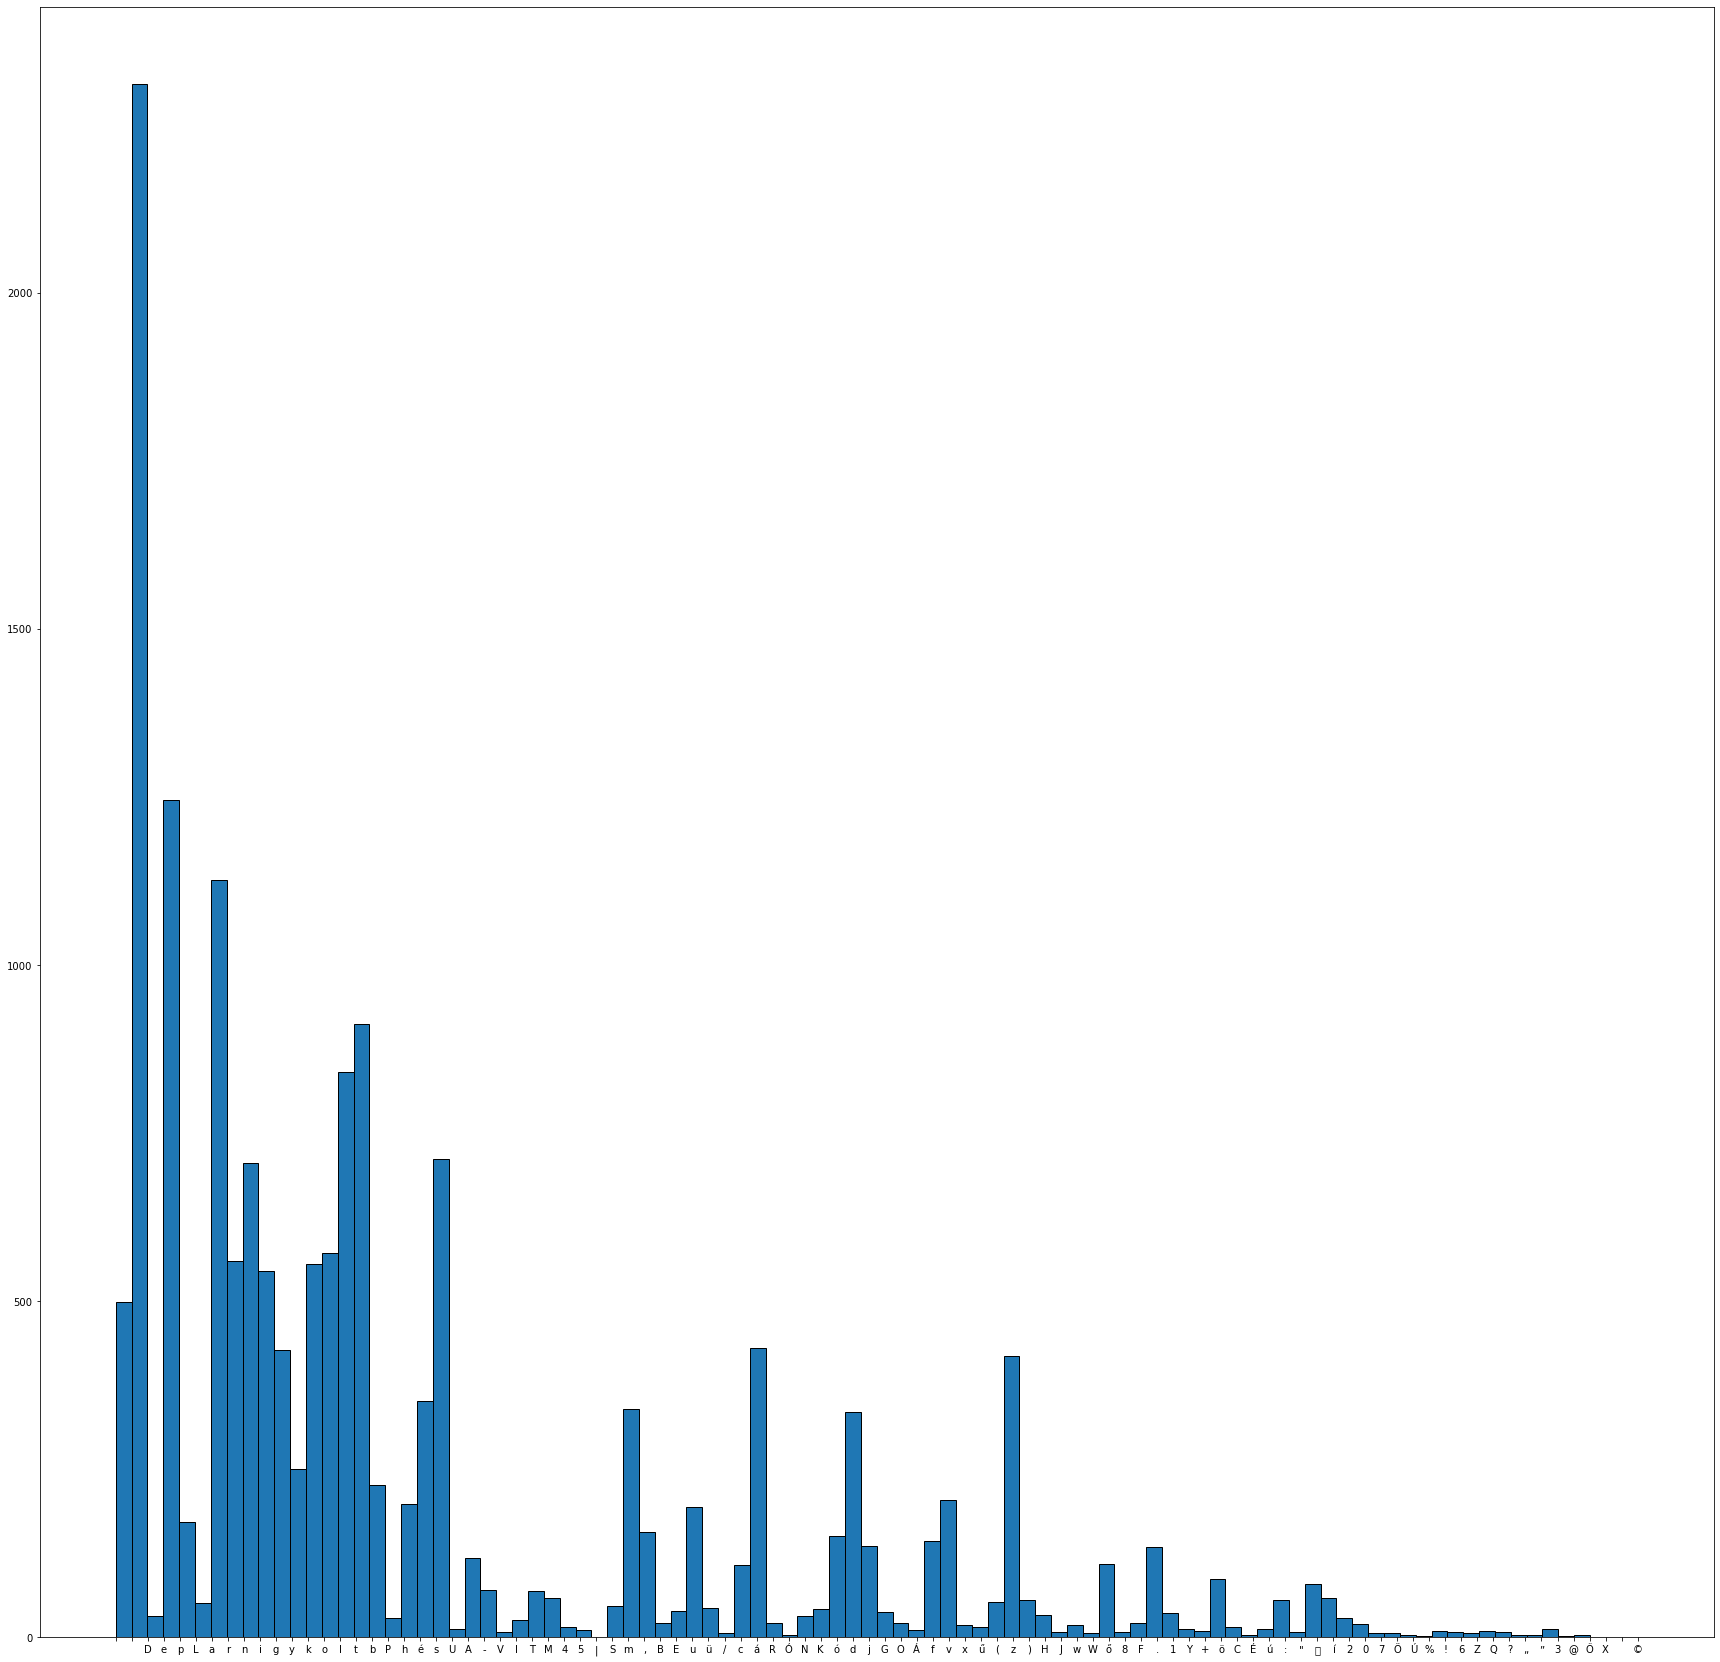

In [61]:
task_05()